In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [1]:
%%capture
%run merging_data.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [3]:
# Combining the datasets from 2016 to 2023
dataframes_list = []

for year in years:
    dataframes_list.append(merged_years[year])

combined_years = pd.concat(dataframes_list, ignore_index=True)

combined_years

,City,status,Household Income,All,African American,American Indian,Hispanic/ Latinx,Pacific Islander,Asian,White,Domestic Unknown,Int'l,Female,Male,Other,Unknown,Measure Values
0,Alameda,Adm,131116,220.0,10.0,0.0,8.0,0.0,140.0,39.0,3.0,0.0,120.0,98.0,0.0,0.0,3.949851
1,Alameda,App,131116,292.0,19.0,0.0,14.0,0.0,174.0,52.0,5.0,0.0,158.0,132.0,0.0,0.0,3.950483
2,Alhambra,Adm,72406,284.0,0.0,0.0,15.0,0.0,255.0,0.0,0.0,0.0,151.0,123.0,0.0,8.0,3.743325
3,Alhambra,App,72406,381.0,0.0,0.0,44.0,0.0,317.0,0.0,0.0,0.0,203.0,164.0,0.0,10.0,3.743359
4,Anaheim,Adm,85133,447.0,4.0,0.0,213.0,0.0,141.0,62.0,4.0,0.0,259.0,179.0,0.0,0.0,3.829754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Whittier,App,91457,546.0,12.0,0.0,464.0,0.0,25.0,29.0,0.0,0.0,346.0,184.0,0.0,0.0,4.002486
2220,Yorba Linda,Adm,151534,102.0,0.0,0.0,15.0,0.0,50.0,26.0,7.0,0.0,56.0,39.0,0.0,0.0,4.002059
2221,Yorba Linda,App,151534,157.0,0.0,0.0,24.0,0.0,71.0,47.0,10.0,0.0,90.0,58.0,0.0,0.0,4.002059
2222,Yuba City,Adm,59588,96.0,0.0,0.0,24.0,0.0,47.0,17.0,0.0,0.0,59.0,36.0,0.0,0.0,4.003958


#### How do acceptances differ between male and females?


Percentage of Male Applicants Admitted: 64.14343183419227 %
Percentage of Female Applicants Admitted: 66.95833528298985 %


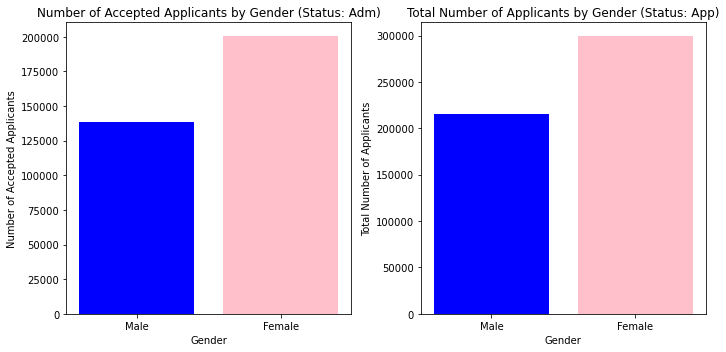

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where status is 'Adm'
df_adm = combined_years[combined_years['status'] == 'Adm']
# Filter the DataFrame for rows where status is 'App'
df_app = combined_years[combined_years['status'] == 'App']

# Sum up the 'All' column separately for male and female applicants where status is 'Adm'
sum_male_adm = df_adm['Male'].sum()
sum_female_adm = df_adm['Female'].sum()

# Sum up the 'All' column separately for male and female applicants where status is 'App'
sum_male_app = df_app['Male'].sum()
sum_female_app = df_app['Female'].sum()

# Calculate the percentage of applicants admitted for each gender
percentage_male = (sum_male_adm / sum_male_app) * 100
percentage_female = (sum_female_adm / sum_female_app) * 100

# Print the percentages
print("Percentage of Male Applicants Admitted:", percentage_male, "%")
print("Percentage of Female Applicants Admitted:", percentage_female, "%")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Male', 'Female'], [sum_male_adm, sum_female_adm], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Accepted Applicants')
plt.title('Number of Accepted Applicants by Gender (Status: Adm)')

plt.subplot(1, 2, 2)
plt.bar(['Male', 'Female'], [sum_male_app, sum_female_app], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Total Number of Applicants')
plt.title('Total Number of Applicants by Gender (Status: App)')

plt.tight_layout()
plt.show()


#### How do acceptances differ between Ethnicities?


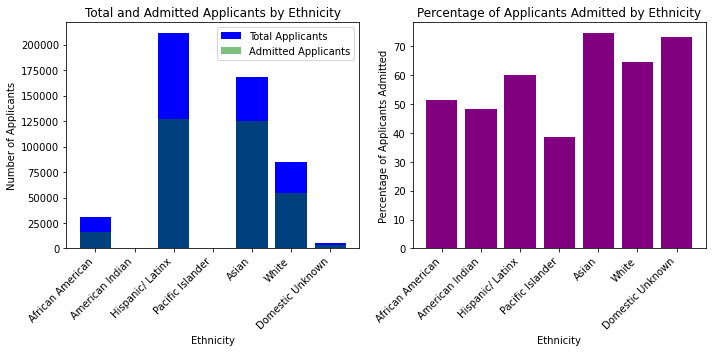

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where status is 'Adm'
df_adm = combined_years[combined_years['status'] == 'Adm']
# Filter the DataFrame for rows where status is 'App'
df_app = combined_years[combined_years['status'] == 'App']

# List of ethnicity groups
ethnicity_groups = ['African American', 'American Indian', 'Hispanic/ Latinx', 'Pacific Islander', 'Asian', 'White', 'Domestic Unknown']

# Initialize dictionaries to store total applicants and total admitted applicants for each ethnicity
total_applicants_ethnicity = {}
total_admitted_ethnicity = {}

# Calculate total applicants and total admitted applicants for each ethnicity
for ethnicity in ethnicity_groups:
    total_applicants_ethnicity[ethnicity] = df_app[ethnicity].sum()
    total_admitted_ethnicity[ethnicity] = df_adm[ethnicity].sum()

# Calculate the percentage of applicants admitted for each ethnicity
percentage_admitted_ethnicity = {}
for ethnicity in ethnicity_groups:
    if total_applicants_ethnicity[ethnicity] != 0:
        percentage_admitted_ethnicity[ethnicity] = (total_admitted_ethnicity[ethnicity] / total_applicants_ethnicity[ethnicity]) * 100
    else:
        percentage_admitted_ethnicity[ethnicity] = 0

# Plotting
plt.figure(figsize=(10, 5))

# Plot total number of applicants and admitted applicants for each ethnicity
plt.subplot(1, 2, 1)
plt.bar(ethnicity_groups, [total_applicants_ethnicity[ethnicity] for ethnicity in ethnicity_groups], label='Total Applicants', color='blue')
plt.bar(ethnicity_groups, [total_admitted_ethnicity[ethnicity] for ethnicity in ethnicity_groups], label='Admitted Applicants', color='green', alpha=0.5)
plt.xlabel('Ethnicity')
plt.ylabel('Number of Applicants')
plt.title('Total and Admitted Applicants by Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Plot percentage of applicants admitted for each ethnicity
plt.subplot(1, 2, 2)
plt.bar(ethnicity_groups, [percentage_admitted_ethnicity[ethnicity] for ethnicity in ethnicity_groups], color='purple')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of Applicants Admitted')
plt.title('Percentage of Applicants Admitted by Ethnicity')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### How do acceptances differ by median income of the city?


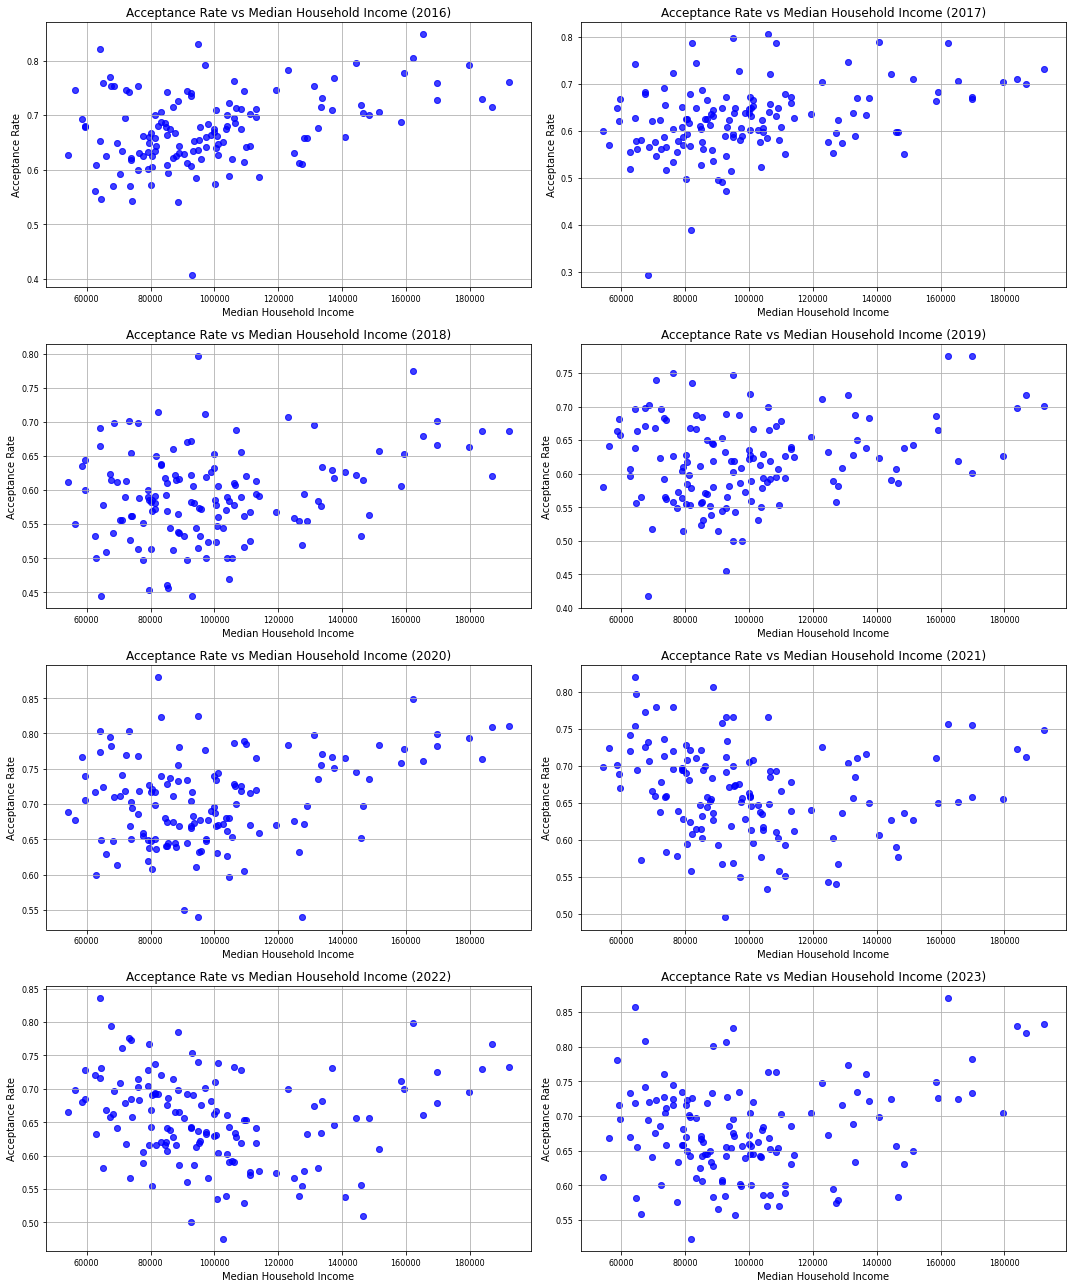

In [13]:
import matplotlib.pyplot as plt

# Define years
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Create subplots for the grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# Loop through each year
for i, year in enumerate(years):
    # Calculate row and column index for subplot
    row = i // 2
    col = i % 2
    
    # Group by city and calculate acceptance rate
    grouped = merged_years[year].groupby('City').apply(lambda x: 
        x[x['status'] == 'Adm']['All'].iloc[0] / x[x['status'] == 'App']['All'].iloc[0]
        if ('Adm' in x['status'].values) and ('App' in x['status'].values)
        else None)
    
    # Rename the column and join with the original DataFrame
    merged_years[year]['Acceptance Rate'] = merged_years[year]['City'].map(grouped)

    # Plot scatter plot
    ax = axes[row, col]
    ax.scatter(merged_years[year]['Household Income'], merged_years[year]['Acceptance Rate'], color='blue', alpha=0.5)
    ax.set_xlabel('Median Household Income', fontsize=10)  # Adjust font size
    ax.set_ylabel('Acceptance Rate', fontsize=10)           # Adjust font size
    ax.set_title(f'Acceptance Rate vs Median Household Income ({year})', fontsize=12)  # Adjust font size
    ax.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label font size
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



#### How does GPA vary between median household income?

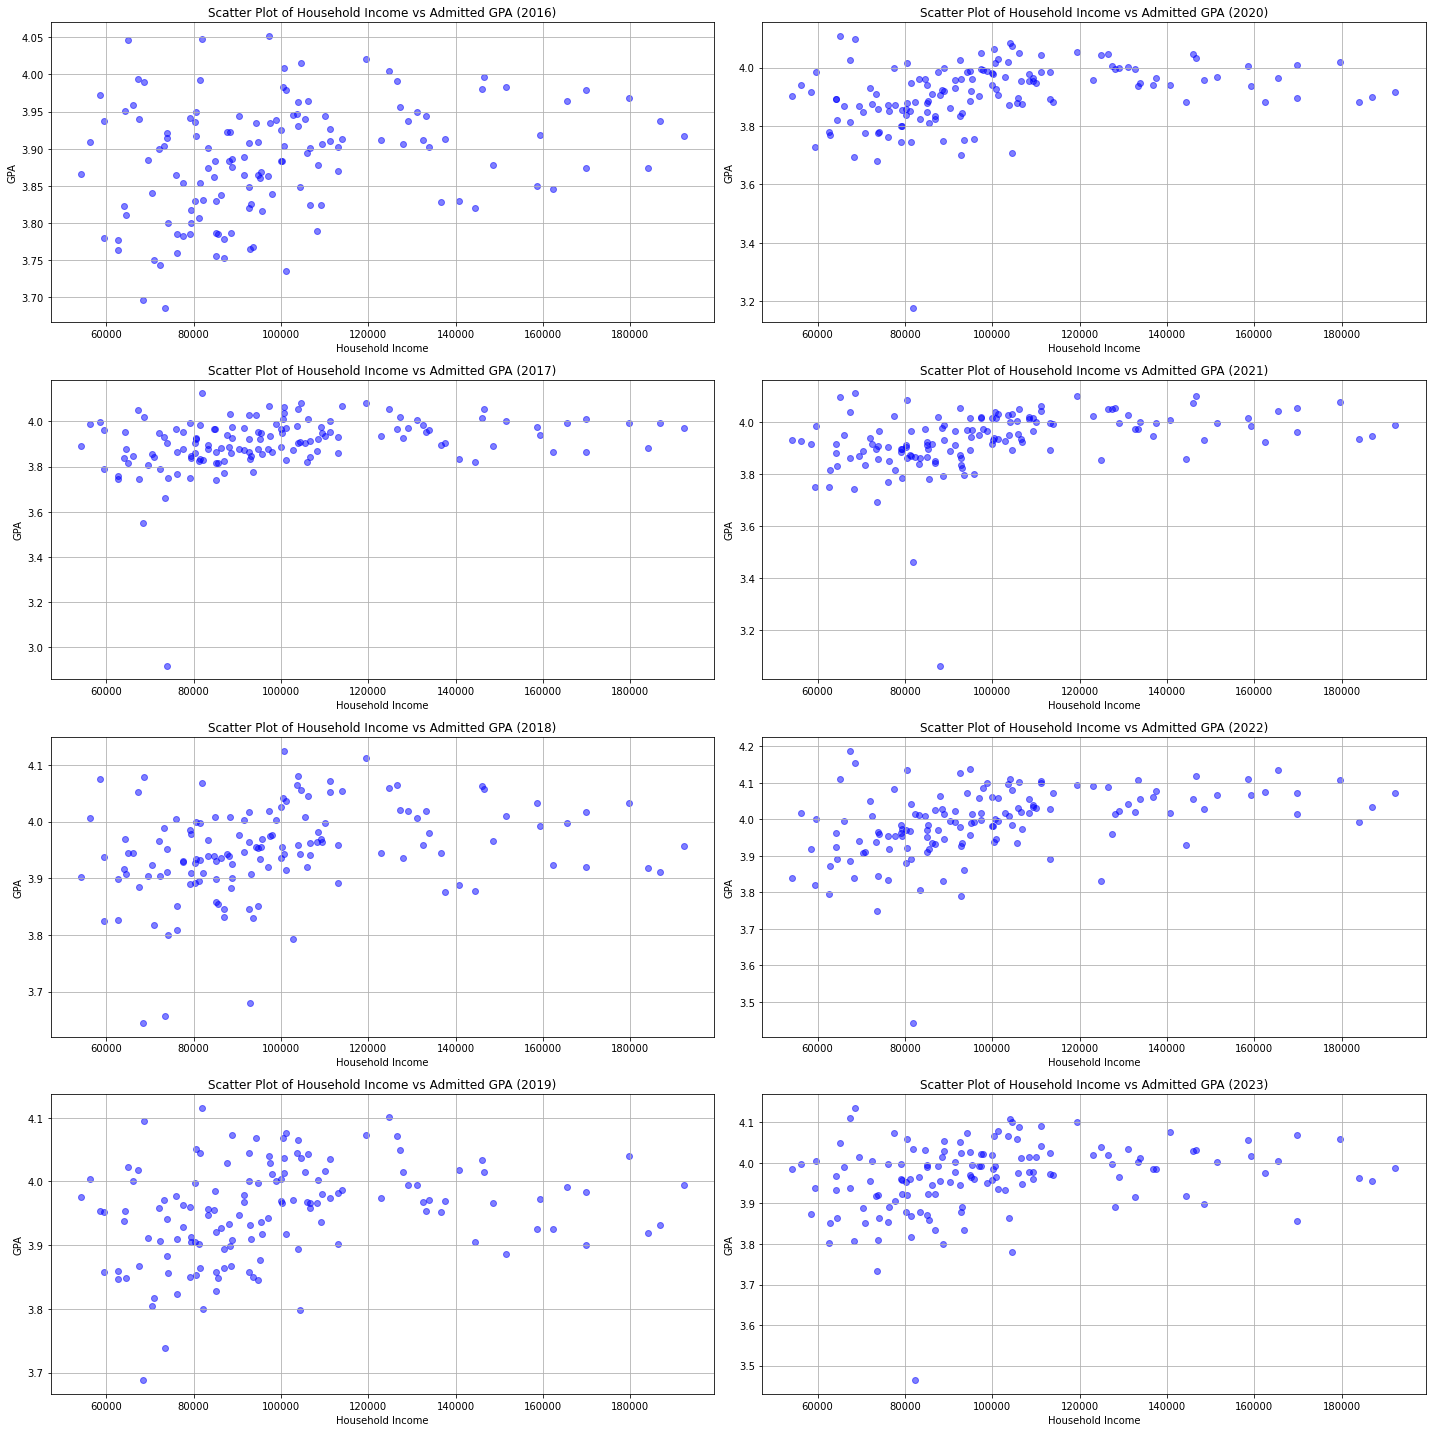

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

adm_data_years = {}  # Dictionary to store filtered data for each year

for year in range(2016, 2024):
    adm_data_years[str(year)] = merged_years[str(year)][merged_years[str(year)]['status'] == 'Adm']

# Iterate over the years and plot scatter plots
for i, year in enumerate(range(2016, 2024)):
    row = i % 4
    col = i // 4
    ax = axs[row, col]
    
    # Check if data is available for the current year
    if str(year) in adm_data_years:
        ax.scatter(adm_data_years[str(year)]['Household Income'], adm_data_years[str(year)]['Measure Values'], color='blue', alpha=0.5)
        ax.set_title(f'Scatter Plot of Household Income vs Admitted GPA ({year})')
        ax.set_xlabel('Household Income')
        ax.set_ylabel('GPA')
        ax.grid(True)
    else:
        ax.axis('off')  # Hide the empty subplot if data is not available

# Adjust layout
plt.tight_layout()
plt.show()


### How does park access vary by income level? (This will be important to verify our instrument is valid later.)

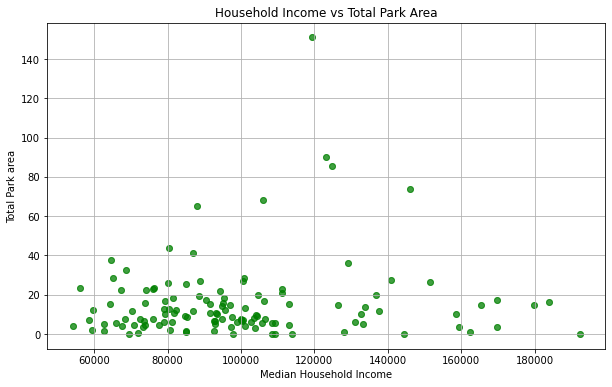

In [8]:
park_income = pd.merge(merged_years['2016'], parks, on='City', how='inner')




# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(park_income['Household Income'], park_income['Parks Area'], color='green', alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('Total Park area')
plt.title('Household Income vs Total Park Area')
plt.grid(True)
plt.show()